In [1]:
import pandas as pd
import numpy as np 
import math
from scipy.signal import find_peaks, peak_widths
from scipy import stats
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['lines.markersize'] = 5

In [2]:
#importing data from exel and convert them into numpy array
transient_array = pd.read_excel('RLC Transient.xlsx', usecols = "A:B")
transient_array = transient_array.to_numpy().T


In [3]:
#linear regression plot for the transient state

'''Shifting the time, then convert it into seconds. The log of the absolute
value of the voltage in volts is also taken'''
x_time = (transient_array[0]+16)*1E-6 
y_volt = np.log(abs(transient_array[1]*1E-3))

x_time_pos = []
x_time_neg = []
y_volt_pos = []
y_volt_neg = []


'''Just creating two sperate linear regression for the positive and negative 
votages.'''
for i in range(len(x_time)):
    if i % 2:
        x_time_pos.append(x_time[i])
        y_volt_pos.append(y_volt[i])
    else:
        x_time_neg.append(x_time[i])
        y_volt_neg.append(y_volt[i])

'''Linear regression model for the positive and the negative peaks sperately'''
slope_pos, intercept_pos, r_value_pos, p_value_pos, std_err_pos \
                                = stats.linregress(x_time_pos, y_volt_pos)

slope_neg, intercept_neg, r_value_neg, p_value_neg, std_err_neg \
                                = stats.linregress(x_time_neg, y_volt_neg)



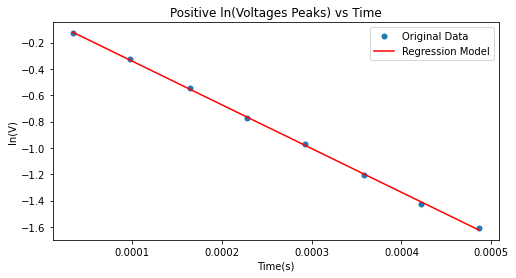

Slope: -3321.1155332138705
Standard Error: 28.896135203952042


In [4]:
x = np.array(x_time_pos)
y = np.array(y_volt_pos)

fig, ax = plt.subplots()

ax.plot(x, y, 'o', label='Original Data')
ax.plot(x, intercept_pos + slope_pos*x, 'r', label='Regression Model')
ax.set(xlabel = 'Time(s)', ylabel ='ln(V)', title = \
      'Positive ln(Voltages Peaks) vs Time')
plt.legend()
plt.savefig('Pos lnV vs time')
plt.show()

print('Slope: ' + str(slope_pos) + \
      '\n' 'Standard Error: ' + str(std_err_pos))

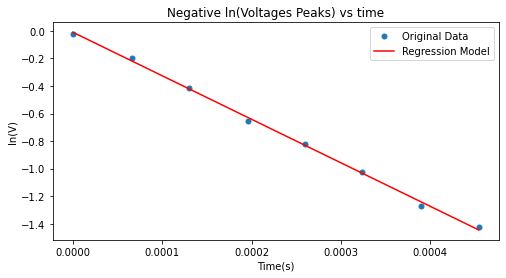

Slope: -3160.818348730741
Standard Error: 49.964438685418855


In [5]:
x = np.array(x_time_neg)
y = np.array(y_volt_neg)

fig, ax = plt.subplots()

ax.plot(x, y, 'o', label='Original Data')
ax.plot(x, intercept_neg + slope_neg*x, 'r', label='Regression Model')
ax.set(xlabel = 'Time(s)', ylabel ='ln(V)', title =\
       'Negative ln(Voltages Peaks) vs time')
plt.legend()
plt.savefig('Neg lnV vs time')
plt.show()

print('Slope: ' + str(slope_neg) + \
      '\n' 'Standard Error: ' + str(std_err_neg))

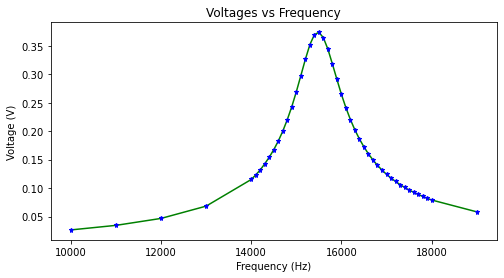

In [6]:
# Preparing data for steady state analysis

data_steady = pd.read_excel('RLC Steady State.xlsx', usecols = "A:B").to_numpy().T
x = np.array(data_steady[0]*1E3) #convert it back to Hz from kHz
y = np.array(data_steady[1]*1E-3) #convert it back to V from mV

fig, ax = plt.subplots()

ax.plot(x, y, '-', color = 'g')
ax.plot(x, y, '*', color = 'b')
ax.set(xlabel = 'Frequency (Hz)', ylabel ='Voltage (V)', title =\
       'Voltages vs Frequency')

plt.show()

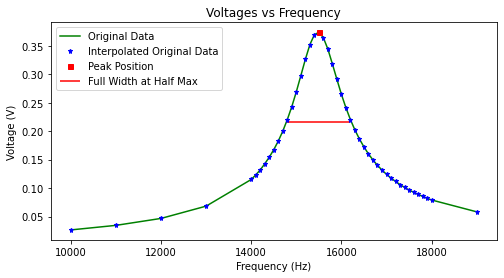

Maximum value at: 15499.999999999996 Hz 
With Standard Deviation of 594.4798301486192 Hz


In [7]:
peaks, _ = find_peaks(y)
results_half = peak_widths(y, peaks, rel_height=0.5)

'''Doing this because the data array can only be subscribed with an integer'''
x_left = x[round(float(results_half[2]))]
x_right = x[round(float(results_half[3]))]

fig, ax = plt.subplots()
ax.plot(x, y, '-', color = 'g', label = 'Original Data')
ax.plot(x, y, '*', color = 'b', label = 'Interpolated Original Data')
ax.plot(x[peaks], y[peaks], 's', color = 'r', label = 'Peak Position')
plt.hlines(results_half[1], x_left, x_right, color = 'r', \
           label = 'Full Width at Half Max')
ax.set(xlabel = 'Frequency (Hz)', ylabel ='Voltage (V)', title =\
       'Voltages vs Frequency')

plt.legend()
plt.savefig('Voltages vs Frequncy with FWHM')
plt.show()

full_width = (x_right - x_left)
std_err = full_width/(2.355)
print('Maximum value at: ' + str(x[int(peaks)]) + ' Hz \n'\
     + 'With Standard Deviation of ' + str(std_err) + ' Hz')